In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
train = data_train.iloc[: , 1:2].values

In [4]:
train.shape

(1258, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [6]:
train_scaled = sc.fit_transform(train)
train_scaled.shape

(1258, 1)

Using 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])

X_train and y_train are lists of arrays

In [8]:
X_train,y_train = np.array(X_train) , np.array(y_train)

In [9]:
X_train.shape

(1198, 60)

Reshaping

In [10]:
X_train = np.reshape(X_train , [X_train.shape[0] , X_train.shape[1] , 1])
X_train.shape

(1198, 60, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout

Using TensorFlow backend.


In [12]:
regressor = Sequential()

Adding the first LSTM layer and some dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units = 1))

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
y_train.shape

(1198,)

In [19]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0381
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055A: 1s - loss: 
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0070
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 

1198/1198 [==============================] - 8s 6ms/step - loss: 0.0014
Epoch 95/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015


In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
dataset_total = pd.concat((data_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

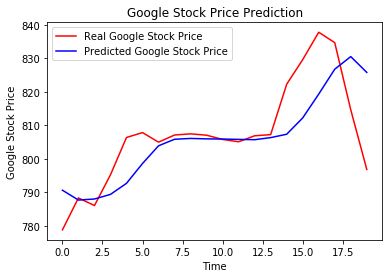

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()